In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats 


#this is a function online for zipcode generation (it can also give us median household income but it's unclear when it has been last updated)
from uszipcode import SearchEngine
search = SearchEngine(simple_zipcode=True)
from uszipcode import Zipcode

#these two don't end up being used yet
from pprint import pprint
import json


source1 = 'Rolling Sales NYC/2018_brooklyn.csv'
source2 = 'Rolling Sales NYC/rollingsales_brooklyn_2019.csv'
df_2018 = pd.read_csv(source1)
df_2019= pd.read_csv(source2)

df_2018 = df_2018.rename(columns={"SALE PRICE\n": "", "SALE DATE\n": "SALE DATE", "ZIP CODE\n" : "ZIP CODE"})
df_2019 = df_2019.rename(columns={" SALE PRICE ": ""})

df_2018.columns

Index(['BOROUGH\n', 'NEIGHBORHOOD\n', 'BUILDING CLASS CATEGORY\n',
       'TAX CLASS AS OF FINAL ROLL 18/19', 'BLOCK\n', 'LOT\n', 'EASE-MENT\n',
       'BUILDING CLASS AS OF FINAL ROLL 18/19', 'ADDRESS\n',
       'APARTMENT NUMBER\n', 'ZIP CODE', 'RESIDENTIAL UNITS\n',
       'COMMERCIAL UNITS\n', 'TOTAL UNITS\n', 'LAND SQUARE FEET\n',
       'GROSS SQUARE FEET\n', 'YEAR BUILT\n', 'TAX CLASS AT TIME OF SALE\n',
       'BUILDING CLASS AT TIME OF SALE\n', '', 'SALE DATE'],
      dtype='object')

In [10]:
#DF2 is the NYC Rolling Sales, this was pulled from the csv in the first box (source2)
df_2018[''] = df_2018[''].str.replace(',','')
df_2018[''] = df_2018[''].str.replace('$','').astype(float)
df_2019[''] = df_2019[''].str.replace(',','').astype(float)

#Remove abnormally low values
df_2018 = df_2018.loc[df_2018[''] > 10]
df_2019 = df_2019.loc[df_2019[''] > 10]


#Create a boolean mask to sort by the month of September)
mask_Aug_2018 = (df_2018['SALE DATE'] > '8/0/2018') & (df_2018['SALE DATE'] <= '8/31/2018')
df_aug = df_2018.loc[mask_Aug_2018]
mask_Sept_2018 = (df_2018['SALE DATE'] > '9/0/2018') & (df_2018['SALE DATE'] <= '9/31/2018')
df_sept = df_2018.loc[mask_Sept_2018]
mask_Oct_2018 = (df_2018['SALE DATE'] > '10/0/2018') & (df_2018['SALE DATE'] <= '10/31/2018')
df_oct = df_2018.loc[mask_Oct_2018]
mask_Nov_2018 = (df_2018['SALE DATE'] > '11/0/2018') & (df_2018['SALE DATE'] <= '11/31/2018')
df_nov = df_2018.loc[mask_Nov_2018]
mask_Dec_2018 = (df_2018['SALE DATE'] > '12/0/2018') & (df_2018['SALE DATE'] <= '12/31/2018')
df_dec = df_2018.loc[mask_Dec_2018]
mask_Jan_2019 = (df_2019['SALE DATE'] > '1/0/2019') & (df_2019['SALE DATE'] <= '1/31/2019')
df_jan = df_2019.loc[mask_Jan_2019]
mask_Feb_2019 = (df_2019['SALE DATE'] > '2/0/2019') & (df_2019['SALE DATE'] <= '2/31/2019')
df_feb = df_2019.loc[mask_Feb_2019]
mask_Mar_2019 = (df_2019['SALE DATE'] > '3/0/2019') & (df_2019['SALE DATE'] <= '3/31/2019')
df_mar = df_2019.loc[mask_Mar_2019]

In [11]:
#Group NYC Sales data by average price by neighborhood
# df_2018_Allzips = df_2018.groupby("ZIP CODE").agg({'SALE PRICE':'mean'}).reset_index()
# df_2019_Allzips = df2_nonzero_sept.groupby("NEIGHBORHOOD").agg({' SALE PRICE ':'count'}).reset_index()

df_aug_allzips = df_aug.groupby("ZIP CODE").agg({"" : "median"}).reset_index()
df_sept_allzips = df_sept.groupby("ZIP CODE").agg({"" : "median"}).reset_index()
df_oct_allzips = df_oct.groupby("ZIP CODE").agg({"" : "median"}).reset_index()
df_nov_allzips = df_nov.groupby("ZIP CODE").agg({"" : "median"}).reset_index()
df_dec_allzips = df_dec.groupby("ZIP CODE").agg({"" : "median"}).reset_index()
df_jan_allzips = df_jan.groupby("ZIP CODE").agg({"" : "median"}).reset_index()
df_feb_allzips = df_feb.groupby("ZIP CODE").agg({"" : "median"}).reset_index()
df_mar_allzips = df_mar.groupby("ZIP CODE").agg({"" : "median"}).reset_index()

In [12]:
dates = [' Aug 2018', ' Sept 2018',' Oct 2018',' Nov 2018',' Dec 2018',' Jan 2019',' Feb 2019',' Mar 2019', '']

df_all_months = pd.merge(df_aug_allzips,df_sept_allzips, on = 'ZIP CODE',how = 'outer', suffixes = (dates[0],dates[1]))
df_all_months = pd.merge(df_all_months,df_oct_allzips, on = 'ZIP CODE',how = 'outer', suffixes = (dates[0],dates[1]))
df_all_months = pd.merge(df_all_months,df_nov_allzips, on = 'ZIP CODE',how = 'outer', suffixes = (dates[2],dates[3]))
df_all_months = pd.merge(df_all_months,df_dec_allzips, on = 'ZIP CODE',how = 'outer', suffixes = (dates[2],dates[3]))
df_all_months = pd.merge(df_all_months,df_jan_allzips, on = 'ZIP CODE',how = 'outer', suffixes = (dates[4],dates[5]))
df_all_months = pd.merge(df_all_months,df_feb_allzips, on = 'ZIP CODE',how = 'outer', suffixes = (dates[4],dates[5]))
df_all_months = pd.merge(df_all_months,df_mar_allzips, on = 'ZIP CODE',how = 'outer', suffixes = (dates[6],dates[7]))

df_all_months

,ZIP CODE,Aug 2018,Sept 2018,Oct 2018,Nov 2018,Dec 2018,Jan 2019,Feb 2019,Mar 2019
0,0.0,12500.0,NaN,2500000.0,825000.0,405000.0,NaN,NaN,NaN
1,11201.0,1265000.0,989500.0,825000.0,910000.0,1558750.0,825000.0,839500.0,1130000.0
2,11203.0,555000.0,571500.0,525000.0,460000.0,544000.0,620000.0,621000.0,702671.5
3,11204.0,615201.0,925000.0,1100000.0,680191.0,768778.5,989000.0,923750.0,896060.0
4,11205.0,780000.0,952500.0,818500.0,997885.0,821500.0,950000.0,988000.0,895948.5
5,11206.0,849500.0,1270000.0,685802.5,729474.0,819691.0,749228.0,698112.0,1350000.0
6,11207.0,780000.0,650000.0,550000.0,650000.0,499999.5,540000.0,590585.0,571650.0
7,11208.0,670000.0,547500.0,615000.0,560000.0,675000.0,532336.0,650000.0,590000.0
8,11209.0,870000.0,530000.0,904400.0,620000.0,962500.0,557500.0,352450.0,910000.0
9,11210.0,900000.0,715000.0,750000.0,635000.0,564500.0,575000.0,668500.0,799000.0


In [13]:
#Ltrain_zipcodes = [11211,11206,11207,11221,11237,11236,11234,11249]
Ltrain_zipcodes = [11249,11222,11211,11206,11237,11378,11387,11233,11212,11207,11236]

df_all_months_L = df_all_months[df_all_months['ZIP CODE'].isin(Ltrain_zipcodes)]
df_all_months_L.reset_index(drop = True)

,ZIP CODE,Aug 2018,Sept 2018,Oct 2018,Nov 2018,Dec 2018,Jan 2019,Feb 2019,Mar 2019
0,11206.0,849500.0,1270000.0,685802.5,729474.0,819691.0,749228.0,698112.0,1350000.0
1,11207.0,780000.0,650000.0,550000.0,650000.0,499999.5,540000.0,590585.0,571650.0
2,11211.0,1587500.0,1200000.0,774429.5,778526.0,1037500.0,1250000.0,1375000.0,960000.0
3,11212.0,525000.0,515000.0,450000.0,696500.0,613740.0,666000.0,825000.0,620500.0
4,11222.0,1175000.0,2100000.0,1400000.0,1117500.0,1100000.0,1575000.0,1337500.0,1398843.5
5,11233.0,822500.0,994999.5,966000.0,772000.0,900000.0,845000.0,625000.0,737500.0
6,11236.0,565000.0,510000.0,587474.0,542500.0,595000.0,539500.0,586265.0,550000.0
7,11237.0,1175000.0,842500.0,850000.0,1225000.0,998000.0,1750000.0,1637500.0,1550000.0
8,11249.0,1185000.0,999062.0,1300000.0,973354.0,999000.0,1590551.0,1462747.0,1517500.0


In [14]:
row_list = []
dates = list(df_all_months_L.columns[1:9])

for index,row in df_all_months_L.iterrows():
    zipcode_list = [row[dates[0]],
                    row[dates[1]],
                    row[dates[2]],
                    row[dates[3]],
                    row[dates[4]],
                    row[dates[5]],
                    row[dates[6]],
                    row[dates[7]]]
    row_list.append(zipcode_list)

Text(0, 0.5, 'Price of Sale ($)')

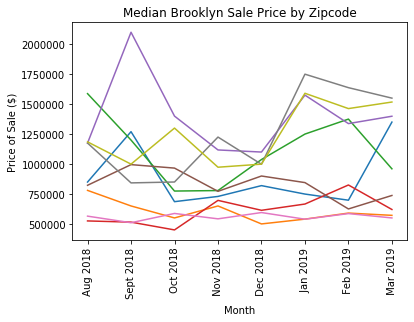

In [20]:
plt.plot(dates,row_list[0])
plt.plot(dates,row_list[1])
plt.plot(dates,row_list[2])
plt.plot(dates,row_list[3])
plt.plot(dates,row_list[4])
plt.plot(dates,row_list[5])
plt.plot(dates,row_list[6])
plt.plot(dates,row_list[7])
plt.plot(dates,row_list[8])

plt.xticks(rotation = 90)
plt.title('Median Brooklyn Sale Price by Zipcode')
plt.xlabel('Month')
plt.ylabel('Price of Sale ($)')

([0, 1, 2, 3, 4, 5, 6, 7], <a list of 8 Text xticklabel objects>)

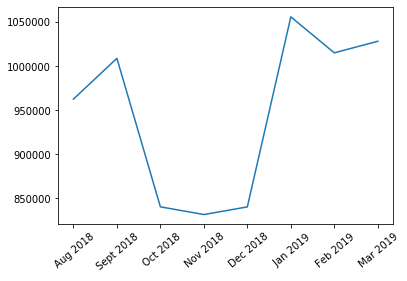

In [16]:
aug_av = df_all_months_L[dates[0]].mean()
sept_av = df_all_months_L[dates[1]].mean()
oct_av = df_all_months_L[dates[2]].mean()
nov_av = df_all_months_L[dates[3]].mean()
dec_av = df_all_months_L[dates[4]].mean()
jan_av = df_all_months_L[dates[5]].mean()
feb_av = df_all_months_L[dates[6]].mean()
mar_av = df_all_months_L[dates[7]].mean()


L_train_av = [aug_av, sept_av, oct_av, nov_av, dec_av, jan_av, feb_av, mar_av]

plt.plot(dates,L_train_av)
plt.xticks(rotation = 40)

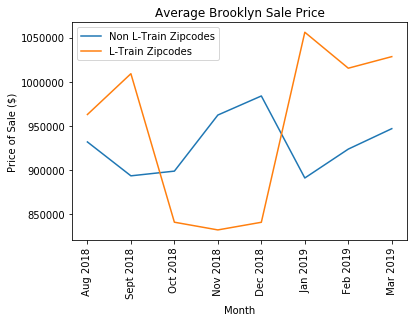

In [17]:
Ltrain_zipcodes = [11249,11222,11211,11206,11237,11378,11387,11233,11212,11207,11236]

df_all_months = df_all_months.dropna()
df_else_months = df_all_months[~df_all_months['ZIP CODE'].isin(Ltrain_zipcodes)]

aug_av_elsezips = df_else_months[dates[0]].mean()
sept_av_elsezips = df_else_months[dates[1]].mean()
oct_av_elsezips = df_else_months[dates[2]].mean()
nov_av_elsezips = df_else_months[dates[3]].mean()
dec_av_elsezips = df_else_months[dates[4]].mean()
jan_av_elsezips = df_else_months[dates[5]].mean()
feb_av_elsezips = df_else_months[dates[6]].mean()
mar_av_elsezips = df_else_months[dates[7]].mean()

train_av_elsezips = [aug_av_elsezips,
                    sept_av_elsezips,
                    oct_av_elsezips,
                    nov_av_elsezips,
                    dec_av_elsezips,
                    jan_av_elsezips,
                    feb_av_elsezips,
                    mar_av_elsezips]
fig,ax = plt.subplots()

Non_L_Zips, = plt.plot(dates,train_av_elsezips,label = "Non L-Train Zipcodes")
L_Zips, = plt.plot(dates,L_train_av, label = "L-Train Zipcodes")

plt.xticks(rotation = 90)
plt.title('Average Brooklyn Sale Price')
plt.xlabel('Month')
plt.ylabel('Price of Sale ($)')
ax.legend(handles = (Non_L_Zips,L_Zips))

In [6]:
#Regroup for Statistical Testing
df_else_months = df_all_months[~df_all_months['ZIP CODE'].isin(Ltrain_zipcodes)]

stat_aug_Lzips = df_aug[df_aug["ZIP CODE"].isin(Ltrain_zipcodes)].count()
stat_sept_Lzips = df_sept[df_sept["ZIP CODE"].isin(Ltrain_zipcodes)].count()
stat_oct_Lzips = df_oct[df_oct["ZIP CODE"].isin(Ltrain_zipcodes)].count()
stat_nov_Lzips = df_nov[df_nov["ZIP CODE"].isin(Ltrain_zipcodes)].count()
stat_dec_Lzips = df_dec[df_dec["ZIP CODE"].isin(Ltrain_zipcodes)].count()
stat_jan_Lzips = df_jan[df_jan["ZIP CODE"].isin(Ltrain_zipcodes)].count()
stat_feb_Lzips = df_feb[df_feb["ZIP CODE"].isin(Ltrain_zipcodes)].count()
stat_mar_Lzips = df_mar[df_mar["ZIP CODE"].isin(Ltrain_zipcodes)].count()

stat_aug_elsezips = df_aug[~df_aug["ZIP CODE"].isin(Ltrain_zipcodes)].count()
stat_sept_elsezips = df_sept[~df_sept["ZIP CODE"].isin(Ltrain_zipcodes)].count()
stat_oct_elsezips = df_oct[~df_oct["ZIP CODE"].isin(Ltrain_zipcodes)].count()
stat_nov_elsezips = df_nov[~df_nov["ZIP CODE"].isin(Ltrain_zipcodes)].count()
stat_dec_elsezips = df_dec[~df_dec["ZIP CODE"].isin(Ltrain_zipcodes)].count()
stat_jan_elsezips = df_jan[~df_jan["ZIP CODE"].isin(Ltrain_zipcodes)].count()
stat_feb_elsezips = df_feb[~df_feb["ZIP CODE"].isin(Ltrain_zipcodes)].count()
stat_mar_elsezips = df_mar[~df_mar["ZIP CODE"].isin(Ltrain_zipcodes)].count()

stat_L_list = [stat_aug_Lzips[''],
               stat_sept_Lzips[''],
               stat_oct_Lzips[''],
               stat_nov_Lzips[''],
               stat_dec_Lzips[''],
               stat_jan_Lzips[''],
               stat_feb_Lzips[''],
               stat_mar_Lzips['']]
stat_else_list = [stat_aug_elsezips[''],
               stat_sept_elsezips[''],
               stat_oct_elsezips[''],
               stat_nov_elsezips[''],
               stat_dec_elsezips[''],
               stat_jan_elsezips[''],
               stat_feb_elsezips[''],
               stat_mar_elsezips['']]


fig, ax = plt.subplots()
L_Sales_Count, = plt.plot(dates,stat_L_list, label = "L-Train Zipcodes")
Non_L_Sales_Count, = plt.plot(dates,stat_else_list, label = "Non L-Train Zipcodes")
plt.title("Brooklyn Sale Count")
plt.legend(handles = (L_Sales_Count, Non_L_Sales_Count))
plt.xticks(rotation = 90)
plt.ylabel("Amount of Sales")
plt.xlabel("Month")

NameError: name 'df_all_months' is not defined

In [7]:
stat_L_pc_list = []
for i,j in zip(stat_L_list[:-1], stat_L_list[1:]):
    L_pc = (j/i-1)*100
    stat_L_pc_list.append(L_pc)

stat_else_pc_list = []
for i,j in zip(stat_else_list[:-1], stat_else_list[1:]):
    else_pc = (j/i-1)*100
    stat_else_pc_list.append(else_pc)

stat_L_pc_list
stat_else_pc_list

fig, ax = plt.subplots()

ind = np.arange(7)
width = 0.35
p1 = ax.bar(ind, stat_L_pc_list, width, bottom=0)
p2 = ax.bar(ind+width, stat_else_pc_list, width, bottom=0)

ax.set_title('Amount of Brooklyn Sales, % Change')
ax.set_xticks(ind + width / 2)
ax.set_xticklabels(dates[1:])
plt.xticks(rotation="vertical")

ax.legend((p1[0], p2[0]), ('L-Train Zipcodes', 'Non L-Train Zipcodes'))
plt.xlabel("Month")
plt.ylabel("% Change")

NameError: name 'stat_L_list' is not defined

In [8]:
# stat_sept_Lzips = stat_sept_Lzips.loc[stat_sept_Lzips[""] < 5000000 ]

stats.ttest_ind(stat_sept_elsezips[""], stat_oct_elsezips[""], equal_var=False)
stats.ttest_ind(stat_sept_Lzips[""], stat_oct_Lzips[""], equal_var=False)

# stat_mar_elsezips.to_csv("Rolling Sales NYC/stat_mar_elsezips.csv",index=False)


NameError: name 'stat_sept_elsezips' is not defined

In [283]:
def gendata(loc1=0, loc2=0):
    population1 = stats.norm.rvs(stat_sept_Lzips[""])
    population2 = stats.norm.rvs(stat_oct_Lzips[""])

    # Scatter Plot of Data
    plt.subplot(2, 1, 1)
    plt.scatter(range(len(population1)), population1, label="population1")
    plt.scatter(range(len(population2)), population2, label="population2")
    plt.legend()

    # Histogram Plot of Data
    plt.subplot(2, 1, 2)
    plt.hist(population1, 10, density=True, alpha=0.7, label="population1")
    plt.hist(population2, 10, density=True, alpha=0.7, label="population2")
    plt.axvline(population1.mean(), color='k', linestyle='dashed', linewidth=1)
    plt.axvline(population2.mean(), color='k', linestyle='dashed', linewidth=1)
    plt.legend()  
    
    return population1, population2

62000000.0

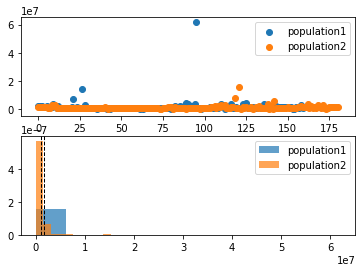

In [284]:
population1, population2 = gendata()

stat_sept_Lzips[""].max()